# Lab 6: Root finding (2)

In this lab we will continue our study of root-finding methods, now considering the famous Newton-Raphson algorithm. This requires that we know the function's derivative; we can either specify this by hand or use the differentiation algorithms from Lab 5.

## The Newton-Raphson method: basics

Recall that the Newton-Raphson algorithm involves linearising the function at some guess $x_0$ – that is, we follow the *derivative* down to the $x$-axis rather than the function itself:

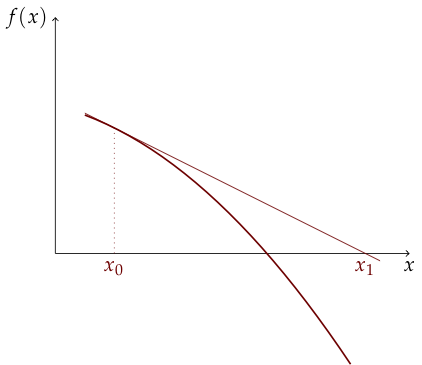

Mathematically, 
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

**Write a function `newton_step(f, fp, x0)` to calculate the next step** (*i.e.*, $x_1$) **from the Newton-Raphson algorithm**, given function `f` and its derivative `fp` (“f prime”) and starting value `x0`.

In [2]:
def newton_step(f, fp, x0):
    x1 = x0 - (f(x0) / fp(x0))
    return x1
    """Perform one step of the Newton-Raphson algorithm."""
    # your code here

As a test, let's use this to calculate $\sqrt{2}$. **Define two (Python) functions** correponding to the mathematical functions $f(x) = x^2 - 2$ and $f'(x) = 2x$. Then **choose a suitable starting guess** and **write a loop to call your Newton-Raphson function until it has converged** – say, until $x_n$ and $x_{n+1}$ differ by less than $10^{-8}$. **Check your result** by squaring it and seeing whether you get 2. **How many iterations were necessary?**

In [3]:
def f(x):
    return x0**2 - 2
def fp(x):
    return 2*x0
x0 = 2 
s = 0
a = newton_step(f, fp, x0)
while abs(x0 - a) > 1e-8:
    s += 1
    a = x0
    x0 = newton_step(f, fp, x0)
    print(x0)

1.5
1.4166666666666667
1.4142156862745099
1.4142135623746899
1.4142135623730951


In [65]:
#checkpoint 2
from numpy import tan, cos
def f(x):
    return  tan(x) - x
def fp(x):
    return 1/cos(x)**2 - 1
x0 = 8
s = 0
a = newton_step(f, fp, x0)
while abs(x0 - a) > 1e-8:
    s += 1
    a = x0
    x0 = newton_step(f, fp, x0)
    #print(a, x0)
    if abs(x0 - a) < 1e-8:
        print(x0, s)

10.904121659428899 7


Let's investigate how convergence depends on the starting guess. What happens if you start with a guess that is further away? **Try some different starting guesses and come to a conclusion about how dependent the answer we get is on the starting point. Can you explain your results?** (Suggested guesses to try: $10^5$; $-1$; $0$.)

Edit the markdown cell below to add new results for different initial guesses to the table.

Include your explanation.

## Solving Roots of f(x)
| Initial Guess ($x_o$)  | Number of iterations |  Root Found  | Comment |
|----|----|----|----|
| 1   |   5  |1.4142135623730951  | Converges to a root in only 5 steps with high precision|
| 1e5 |  21   |   1.4142135623730951  | Considerbaly more steos than 1 |
|  -1 |   5  |  -1.4142135623730951   | Converges to the negative root |
| 0  |  unknown   | undefined    | division by 0 so it crashes   |
|  1e-5  |  22   |   1.4142135623730951  | Takes a considerable amounts for very small values as it does for large ones|


▶ **CHECKPOINT 1**

## A trickier example

Let's try a more interesting function. We saw in the very first lecture that, in quantum mechanics, the energies available to a particle trapped in a finite well are given by the solutions of equations similar to $\tan(x) = x$. **Use the Newton-Raphson method to find all solutions to this equation in the range $0 \leq x \leq 10$.** 

*Hint*: You will need to rearrange the equation into the form $g(x) = 0$ for some $g(x)$. You may find it helpful to plot this function first.

*Hint 2*: The derivative of $\tan(x)$ is $\sec^2(x)$. The `pylab` module does *not* contain a secant function, so you may want to define your own (recalling that $\sec(x) = 1/\cos(x)$).

*Hint 3*:  It can be helpful to plot the function to identify regions where roots exist, to choose initial guesses and interpret your results.

2.1710903369826325e-08 588


<IPython.core.display.Javascript object>


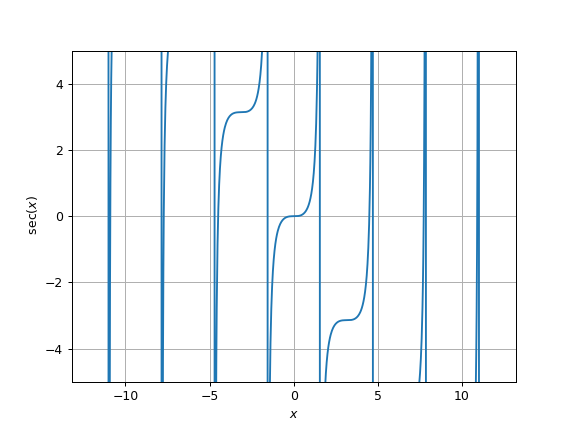

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

roots = []

def newton_step_g(g, gp, x):
    x1 = x - (g(x) / gp(x))
    return x1

def g(x):
    a = np.tan(x) - x# define your function here
    return a

def gp(x):
    b = (1 / (np.cos(x))**2) - 1    # define your function here
    return b

#for x in range(0,10):
 #   c = newton_step_g(g, gp, x)
  #  roots.append(c)
#print(roots) #?
x0 =0.1
while abs(x0 - a) > 1e-8:
    s += 1
    a = x0
    x0 = newton_step(g, gp, x0)
    #print(a, x0)
    if abs(x0 - a) < 1e-8:
        print(x0, s)
x = np.linspace(-12, 12, 1000)
y = g(x)
plt.xlabel('$x$')
plt.ylabel(' $\sec(x)$')
plt.plot(x, y)
plt.ylim(-5,5)
plt.grid()

In [50]:
x0 = 4 
s = 0
a = newton_step(g, gp, x0)
while abs(x0 - a) > 1e-8:
    s += 1
    a = x0
    x0 = newton_step(g, gp, x0)
    #print(a, x0)
    if abs(x0 - a) < 1e-8:
        print(x0, s)

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in tan
  if __name__ == '__main__':
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in cos
  del sys.path[0]


**Explore carefully for which starting guesses the Newton-Raphson converges, to which solution, and in how many iterations. Can you explain your results?**

(Suggested guesses to try: 0.1, 4, 4.5, 8) - edit this cell and summarise your results in the table below.

| Initial Guess ($x_o$)  | Number of iterations |  Root Found  | Comment |
|----|----|----|----|
| 4   | crashes  |    |    |
| 4.5 | 9  |  4.49  |    |
| 8   |550  |  10.9  |    |
| 0.1 |   588|   2.1710903369826325e-08  |    |



▶ **CHECKPOINT 2**

## Using numerical derivatives

Of course, sometimes it is inconvenient to program in the derivative of the function we're exploring. Fortunately, last lab we have seen how to calculate the derivative numerically. I have copied below our central-difference function from that lab, setting the default value of the step size $h$ to $10^{-5}$.

In [22]:
def CD(g, x, h=1e-5):
    """Estimate the derivative f'(x) using the central difference algorithm with step size h."""
    return (g(x + h/2) - g(x - h/2))/h

**Write a revised function `newton_CD_step(f, x0)` to perform one step of the Newton-Raphson algorithm, this time using the derivative from the `CD()` function.**

**Can you find the same roots using this method as you did using the exact derivative?**

▶ **CHECKPOINT 3**

In [24]:
def newton_step_g(g, x):
    return (x - (g(x) / CD(g, x)))
    


s = 0
x = 4.5
a = newton_step_g(g, x)
while abs(x - a) > 1e-8:
    s += 1
    a = x
    x = newton_step_g(g, x)
    print(x, s)
              #if abs(x0 - a) < 1e-8:
        #print(x0, s)

4.493613902746611 1
4.493409655013356 2
4.493409457909247 3
4.493409457909064 4


## Mini-report 1 (10 marks, due Sunday 3 February at 11:59 pm)

For this report you don’t need to write an introduction, methods, conclusion, or references section; I simply want results and discussion.

Your task is to investigate the root-finding algorithms we’ve learnt: the bisection method, *regula falsi*, and now Newton’s method. An augmented list of our questions from lab 4:

- Which functions can these algorithms be applied to? 
- Can you predict how many iterations they will require? 
- Is it possible that they will not converge? 
- Is it possible that they will converge, but not to the nearest root?
- Is it possible that they will converge to a value that is not a root?
- Is it possible that there is a root within the initial range that they do not find?

You may experiment with any function you choose, including the functions from lab 4. For Newton’s method you might like to try $m(x) = \cos(x)$ (try starting with very small but nonzero numbers), $n(x) = x^3 - 2x + 2$ (try starting with 0, 1, 0.14, 0.141) and, if you are feeling particularly masochistic,
$$
p(x) = \begin{cases}\sqrt{x} & x \geq 0 \\
-\sqrt{-x} & x \leq 0\end{cases}.
$$

Try to come to some general conclusions about where each of these methods is most useful and how they might be sensibly combined.

This should be written up as a separate jupyter notebook and submitted to your gitlab project.